In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
# we start by loading the data set contained in the data folder
data = pd.read_csv('./data/heart_attack_prediction_dataset.csv')

In [47]:
# Data inspection
print(data.head())

  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  

In [48]:
#data features
print(data.info())
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(exclude=['object']).columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [49]:
print(" Columns with numerical values are :", list(numerical_columns),"\n","Columns with categorical values are :", list(categorical_columns))

 Columns with numerical values are : ['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Heart Attack Risk'] 
 Columns with categorical values are : ['Patient ID', 'Sex', 'Blood Pressure', 'Diet', 'Country', 'Continent', 'Hemisphere']


We make sure that there are no missing values in our dataset

In [50]:
# Data cleaning
missing_values = data.isna().sum()
print(missing_values)

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


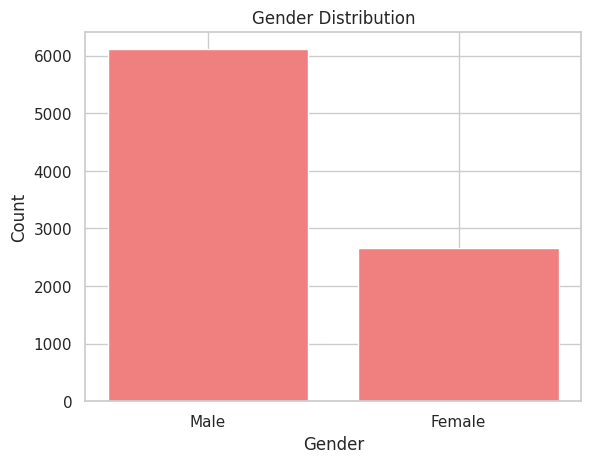

In [51]:
#gender distribution
gender_counts = data['Sex'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color='lightcoral')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()


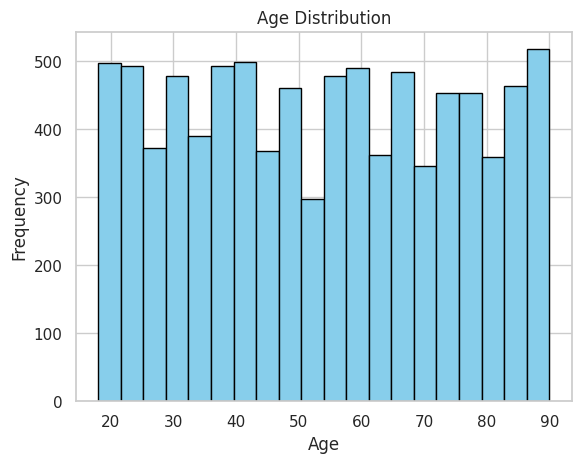

/tmp/ipykernel_3276/1662416728.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Age_Group', palette="Set3")


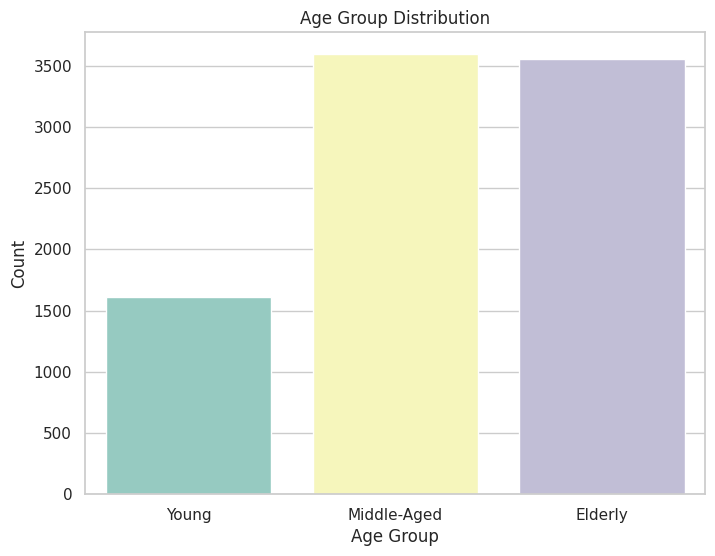

In [52]:
#Age distribution by age and age group

plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

data['Age_Group'] = pd.cut(data['Age'], bins=[0, 30, 60, 100], labels=['Young', 'Middle-Aged', 'Elderly'])
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Age_Group', palette="Set3")
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution')
plt.show()


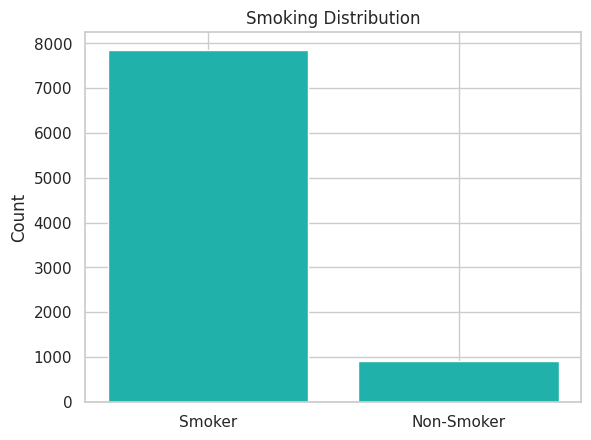

In [53]:
#soking distribution
smoking_counts = data['Smoking'].value_counts()
plt.bar(["Smoker","Non-Smoker"], smoking_counts.values, color='lightseagreen')
plt.ylabel('Count')
plt.title('Smoking Distribution')
plt.show()

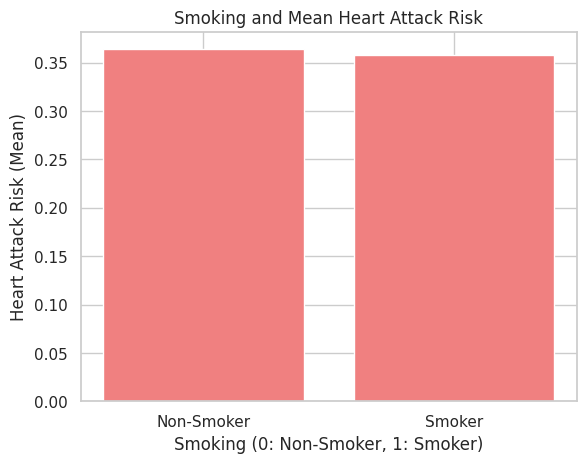

In [54]:
smoking_and_heart_attack = data.groupby('Smoking')['Heart Attack Risk'].mean()

plt.bar(smoking_and_heart_attack.index, smoking_and_heart_attack.values, color='lightcoral')
plt.xlabel('Smoking (0: Non-Smoker, 1: Smoker)')
plt.ylabel('Heart Attack Risk (Mean)')
plt.title('Smoking and Mean Heart Attack Risk')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.show()

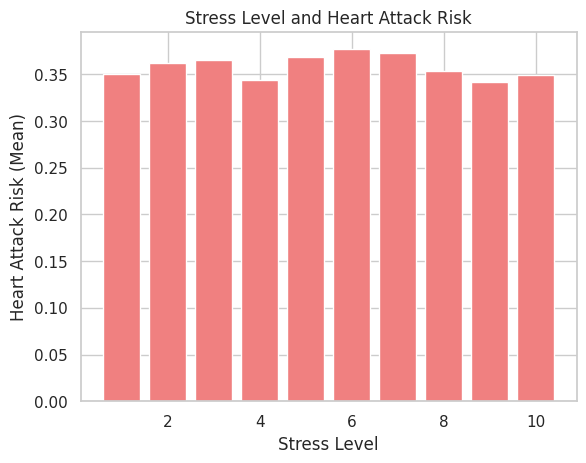

In [57]:
stress_and_heart_attack = data.groupby('Stress Level')['Heart Attack Risk'].mean()
plt.bar(stress_and_heart_attack.index, stress_and_heart_attack.values, color='lightcoral')
plt.xlabel('Stress Level')
plt.ylabel('Heart Attack Risk (Mean)')
plt.title('Stress Level and Heart Attack Risk')
plt.show()

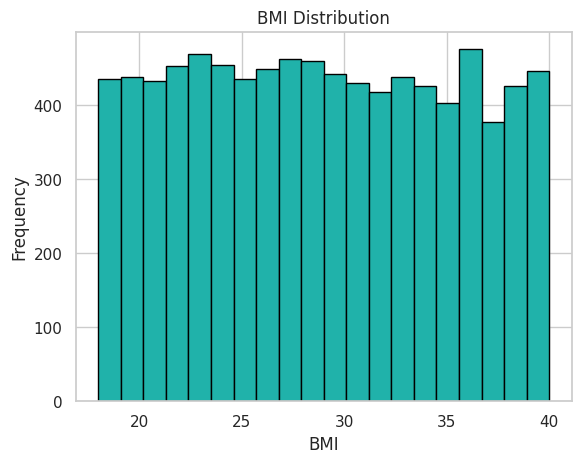

/tmp/ipykernel_3276/875231551.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='BMI_Category', palette="Set3")


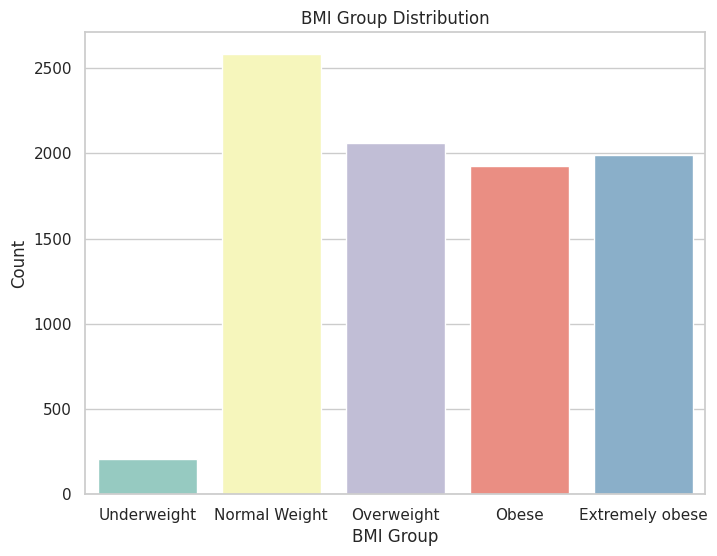

In [65]:

plt.hist(data['BMI'], bins=20, color='lightseagreen', edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show()

data['BMI_Category'] = pd.cut(data['BMI'], bins=[0, 18.5, 24.9, 29.9, 34.9, 100], labels=['Underweight', 'Normal Weight', 'Overweight', 'Obese', 'Extremely obese'])
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='BMI_Category', palette="Set3")
plt.xlabel('BMI Group')
plt.ylabel('Count')
plt.title('BMI Group Distribution')
plt.show()

In [66]:
diabetes_counts

Diabetes
1    5716
0    3047
Name: count, dtype: int64

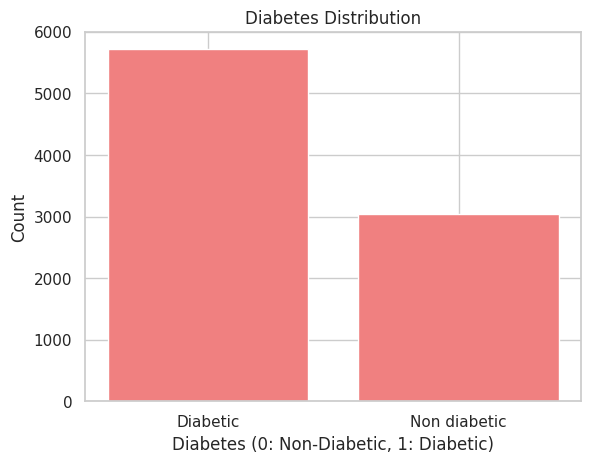

In [68]:
diabetes_counts = data['Diabetes'].value_counts()
plt.bar(["Diabetic", "Non diabetic"], diabetes_counts.values, color='lightcoral')
plt.xlabel('Diabetes (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Count')
plt.title('Diabetes Distribution')
plt.show()

In [69]:
previous_heart_counts

Previous Heart Problems
0    4418
1    4345
Name: count, dtype: int64

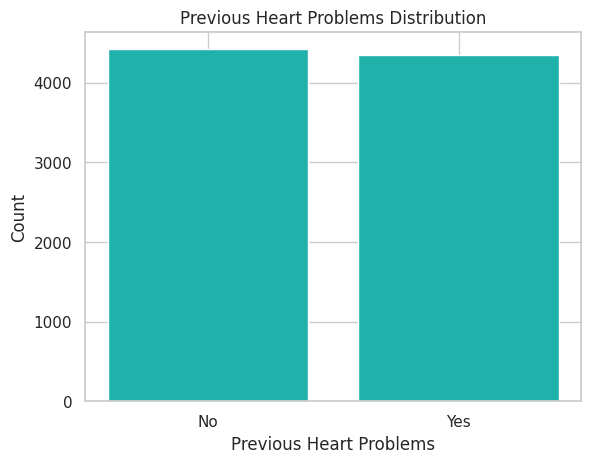

In [71]:
previous_heart_counts = data['Previous Heart Problems'].value_counts()
plt.bar(['No', "Yes"], previous_heart_counts.values, color='lightseagreen')
plt.xlabel('Previous Heart Problems')
plt.ylabel('Count')
plt.title('Previous Heart Problems Distribution')
plt.show()

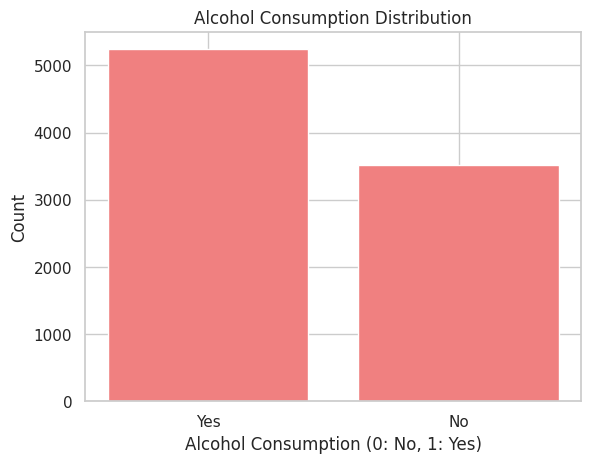

In [73]:
alcohol_counts = data['Alcohol Consumption'].value_counts()
plt.bar(["Yes", "No"], alcohol_counts.values, color='lightcoral')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')
plt.title('Alcohol Consumption Distribution')
plt.show()

In [85]:
numeric_vals = data.select_dtypes(include=['number'])
numeric_corr = numeric_vals.corr()
numeric_corr.sort_values(['Heart Attack Risk'], inplace=True, ascending=False)

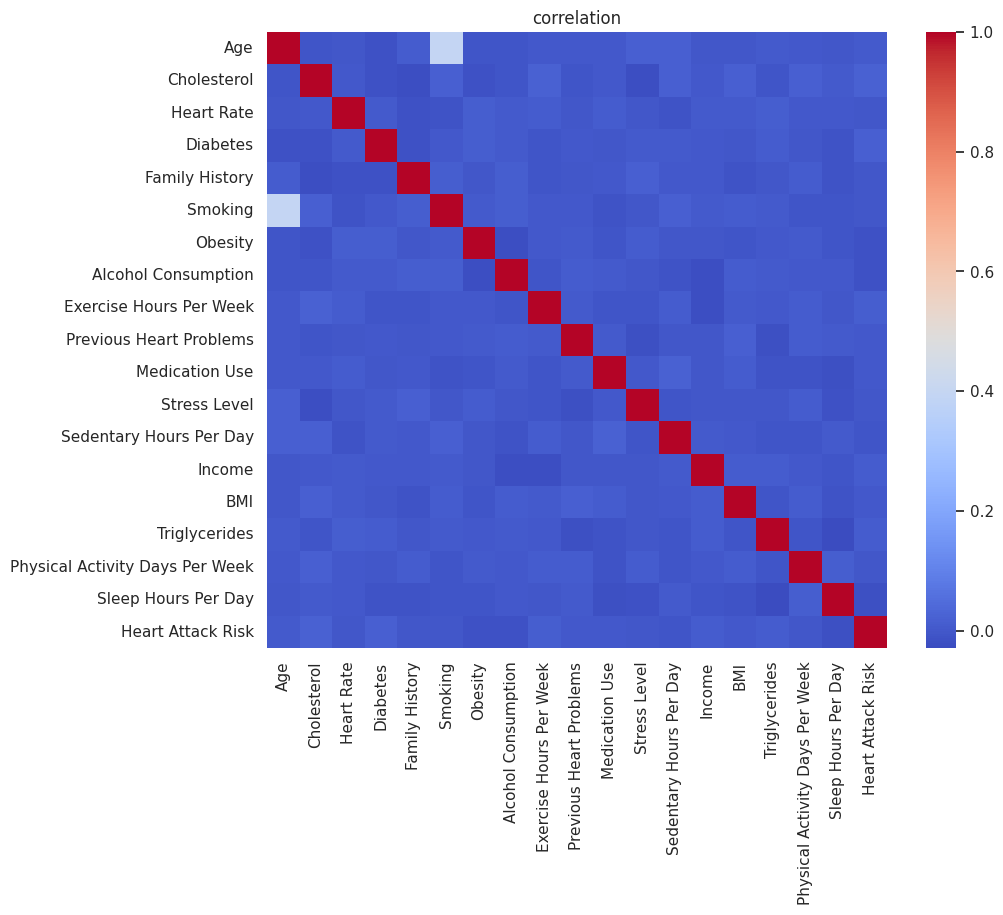

In [84]:


numeric_data = data.select_dtypes(include=["int64","float64"])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', fmt = ".2f")
plt.title("correlation")
plt.show()

